In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [28]:
df = pd.read_csv('/content/hiring - Sheet1.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
# Replace Nan with zero

df['experience'] = df['experience'].fillna('zero')

In [7]:
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=1b511acdc1d2ba4a1d0301610dced7574e5dacc92a9488c72c0ad6b8f91b8c6c
  Stored in directory: /root/.cache/pip/wheels/5b/79/fb/d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number


In [30]:
# Importing w2n in order to covert those words in experience column to number

from word2number import w2n

In [10]:
#converting the experience column to number

df['experience'] = df['experience'].apply(w2n.word_to_num)

In [11]:
print(df)

   experience  test_score  interview_score  salary
0           0         8.0                9   50000
1           0         8.0                6   45000
2           5         6.0                7   60000
3           2        10.0               10   65000
4           7         9.0                6   70000
5           3         7.0               10   62000
6          10         NaN                7   72000
7          11         7.0                8   80000


In [12]:
# Replacing Nan in the test_score column with the mean

mean = df['test_score'].mean()
mean

np.float64(7.857142857142857)

In [13]:
df['test_score'] = df['test_score'].fillna(mean).round(0)

In [14]:
print(df)

   experience  test_score  interview_score  salary
0           0         8.0                9   50000
1           0         8.0                6   45000
2           5         6.0                7   60000
3           2        10.0               10   65000
4           7         9.0                6   70000
5           3         7.0               10   62000
6          10         8.0                7   72000
7          11         7.0                8   80000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      int64  
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [16]:
# converting the test_score column to integer

df['test_score'] = df['test_score'].astype(int)

In [17]:
print(df)

   experience  test_score  interview_score  salary
0           0           8                9   50000
1           0           8                6   45000
2           5           6                7   60000
3           2          10               10   65000
4           7           9                6   70000
5           3           7               10   62000
6          10           8                7   72000
7          11           7                8   80000


In [18]:
# Building a Multiple Linear Regression to predict salaries
# store your model to an object

salpred = linear_model.LinearRegression()

In [19]:
# Fitting your model

salpred.fit(df[['experience','test_score','interview_score']], df['salary'])

LinearRegression()

In [20]:
#Plotting linear graph to verify our model

df

,experience,test_score,interview_score,salary
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


In [36]:
# Predicting salary for an employee with 2 yrs experience,  9 test_score and 6 interview_score

salpred.predict(pd.DataFrame([[2, 9, 6]], columns=['experience', 'test_score', 'interview_score']))

array([54866.00795277])

In [35]:
# Predicting salary for an employee with 2 yrs experience,  9 test_score and 6 interview_score

salpred.predict(pd.DataFrame([[12, 10, 10]], columns=['experience', 'test_score', 'interview_score']))


array([90444.9933727])

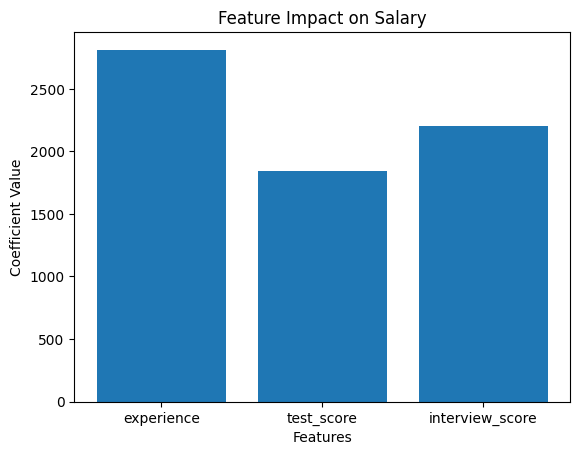

In [23]:
#  Which Factor has the strongest influence on my salary (The chart shows its EXPERIENCE)

features = ['experience', 'test_score', 'interview_score']
coefficients = salpred.coef_

plt.bar(features, coefficients)
plt.title("Feature Impact on Salary")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

### Another way of predicting the salary

In [31]:
salpred.coef_

array([2699.12037595, 2044.82467767, 1635.73924569])

In [32]:
salpred.intercept_

np.float64(21249.90962766599)

In [33]:
# using y = mx + c for predicting 12, 10, 10

y = (2699.12037595*12) + (2044.82467767*10) + (1635.73924569*10) + 21249.90962766599
y

90444.99337266598

In [34]:
salpred.predict([[12,10,10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90444.9933727])